In [139]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import types
import pandas as pd
from botocore.client import Config
import geopandas as gpd

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    

from pandas.io.json import json_normalize
from geopandas.tools import sjoin
from geopandas import GeoDataFrame
from geopy.geocoders import Nominatim
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
from sklearn.cluster import KMeans
#from branca.utilities import split_six

%matplotlib inline

In [93]:
CLIENT_ID = 'MK04PJHURCTVQZU5HZXZ5VXIYMS20FPRD5GJ0KZPCWZ2DMNQ' # 
CLIENT_SECRET = '53MGD40VDOWM5SLFNYHZOSOZHASDDUJABW40OYH5S23FVPSG' # Foursquare information
VERSION = '20180604'
LIMIT = 30

In [94]:
address = 'San Francisco,SF'       ## San Francisco adress   ##Could be Paris

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.7792808 -122.4192363


## Crimes data

In [95]:
data_police=pd.read_csv("C:/Users/Edison/Documents/SyncGoogleDrive/IBM Data Science Professional Certificate/9. Capstone Project/CapstoneProjectIBMDataScience/Police_Department_Incident_Reports__2018_to_Present.csv")

In [96]:
pd.set_option('display.max_columns', 100)
data_police.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
0,2018/12/02 12:45:00 AM,2018/12/02,00:45,2018,Sunday,2018/12/02 01:56:00 AM,74374327130,743743,180908554,183360210.0,II,Initial,NaN,27130,Other Miscellaneous,Other,"Burglary Tools, Possession Of",Cite or Arrest Adult,04TH ST \ JESSIE ST,24635000.0,Southern,Financial District/South Beach,6.0,37.784908,-122.404795,"(37.78490829943, -122.40479506276)",32.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN
1,2018/12/01 08:30:00 PM,2018/12/01,20:30,2018,Saturday,2018/12/01 09:18:00 PM,74370071000,743700,180908112,183353564.0,II,Initial,NaN,71000,Lost Property,Lost Property,Lost Property,Open or Active,POWELL ST \ OFARRELL ST,24904000.0,Central,Tenderloin,3.0,37.786410,-122.408036,"(37.786409612811, -122.408036237445)",19.0,6.0,3.0,36.0,NaN,NaN,1.0,NaN
2,2019/03/18 02:01:00 PM,2019/03/18,14:01,2019,Monday,2019/03/18 02:21:00 PM,78164004134,781640,190194129,190772267.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Cite or Arrest Adult,22ND ST \ POTRERO AVE,23967000.0,Mission,Mission,9.0,37.756834,-122.406699,"(37.756833733806, -122.406699002688)",53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN
3,2019/03/20 08:00:00 AM,2019/03/20,08:00,2019,Wednesday,2019/03/20 02:06:00 PM,78169706244,781697,190199583,190792201.0,II,Initial,NaN,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,JESSIE EAST ST \ MISSION ST,35047000.0,Southern,South of Market,6.0,37.784007,-122.404865,"(37.78400661242, -122.404864795177)",32.0,1.0,10.0,34.0,NaN,NaN,NaN,NaN
4,2019/03/12 01:30:00 PM,2019/03/12,13:30,2019,Tuesday,2019/03/15 06:02:00 PM,78154706372,781547,196055103,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
##Column
columns = ['Incident Datetime', 'Incident Day of Week', 'Incident Year', 
           'Report Datetime', 'Row ID', 'Incident ID', 'CAD Number', 'Report Type Code', 
           'Report Type Description', 'Filed Online', 'Incident Code', 'Incident Subcategory', 
           'Incident Description', 'Intersection', 'CNN', 'Analysis Neighborhood', 
           'Supervisor District', 'Resolution', 'point']
data_police = data_police.drop(columns, axis=1)

KeyError: "['Incident Datetime' 'Incident Day of Week' 'Incident Year'\n 'Report Datetime' 'Row ID' 'Incident ID' 'CAD Number' 'Report Type Code'\n 'Report Type Description' 'Filed Online' 'Incident Code'\n 'Incident Subcategory' 'Incident Description' 'Intersection' 'CNN'\n 'Analysis Neighborhood' 'Supervisor District' 'Resolution' 'point'] not found in axis"

In [47]:
data_police.dropna(inplace=True)
data_police.isnull().sum()

Incident Date                                           0
Incident Time                                           0
Incident Number                                         0
Incident Category                                       0
Police District                                         0
Latitude                                                0
Longitude                                               0
SF Find Neighborhoods                                   0
Current Police Districts                                0
Current Supervisor Districts                            0
Analysis Neighborhoods                                  0
HSOC Zones as of 2018-06-05                             0
OWED Public Spaces                                      0
Central Market/Tenderloin Boundary Polygon - Updated    0
Parks Alliance CPSI (27+TL sites)                       0
dtype: int64

In [48]:
data_police['Incident Category'].unique()

array(['Lost Property', 'Malicious Mischief', 'Warrant', 'Drug Offense',
       'Burglary', 'Larceny Theft', 'Assault', 'Missing Person',
       'Non-Criminal', 'Other Miscellaneous', 'Other Offenses',
       'Offences Against The Family And Children', 'Stolen Property',
       'Suspicious Occ', 'Traffic Violation Arrest', 'Robbery',
       'Weapons Offense', 'Fraud', 'Weapons Carrying Etc', 'Gambling',
       'Disorderly Conduct', 'Miscellaneous Investigation',
       'Drug Violation', 'Other', 'Motor Vehicle Theft',
       'Forgery And Counterfeiting', 'Suicide', 'Homicide'], dtype=object)

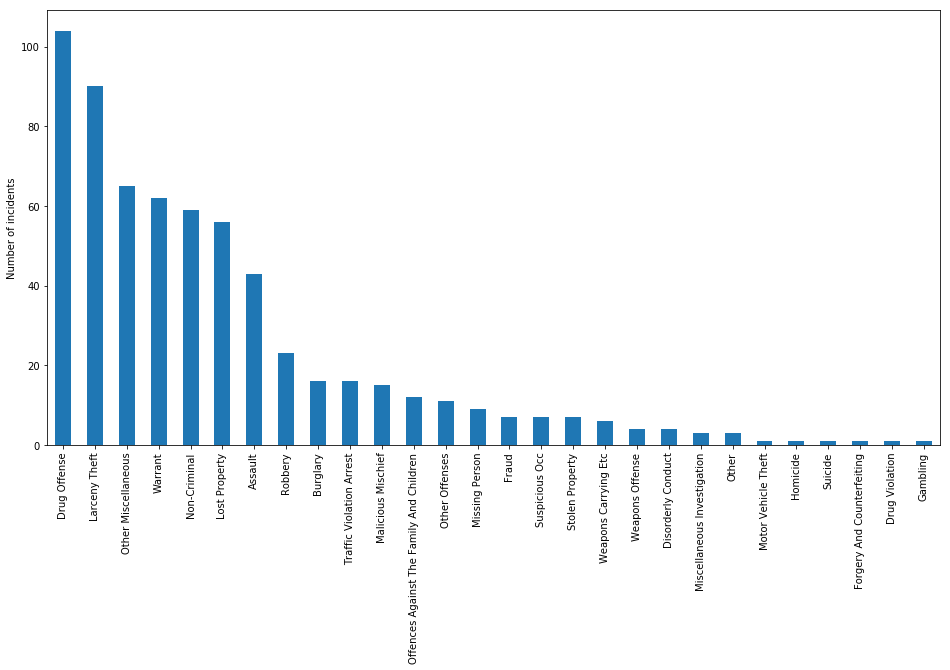

In [49]:
data_police['Incident Category'].value_counts().plot(kind='bar', figsize=(16,8))
plt.ylabel('Number of incidents')
plt.show()

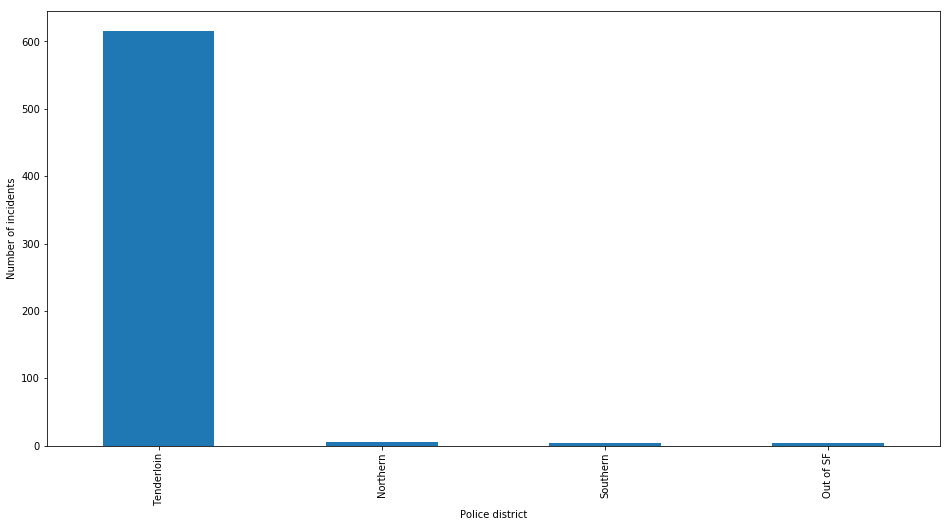

In [50]:

data_police.dropna(inplace=True)
data_police['Incident Category'].unique()
data_police= pd.DataFrame(data_police['Police District'].value_counts().astype(float))
data_police = data_police.reset_index()
data_police.columns = ['District', 'Number']
data_police.plot(kind='bar', figsize=(16,8), legend=None)
xticks = [i for i in range(len(data_police))]
plt.xticks(xticks, list(data_police['District']))
plt.xlabel('Police district')
plt.ylabel('Number of incidents')
plt.show()

In [133]:
geometry = gpd.GeoSeries(data_police.apply(lambda z: Point(z['Longitude'], z['Latitude']), 1), crs={'init': 'epsg:4326'})

In [135]:
data_police = gpd.GeoDataFrame(data_police, geometry=geometry)
data_police.head()

,Incident Date,Incident Time,Incident Number,Incident Category,Police District,Latitude,Longitude,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),geometry
0,2018/12/02,00:45,180908554,Other Miscellaneous,Southern,37.784908,-122.404795,32.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN,POINT (-122.40479506276 37.78490829943045)
1,2018/12/01,20:30,180908112,Lost Property,Central,37.786410,-122.408036,19.0,6.0,3.0,36.0,NaN,NaN,1.0,NaN,POINT (-122.4080362374448 37.78640961281089)
2,2019/03/18,14:01,190194129,Assault,Mission,37.756834,-122.406699,53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN,POINT (-122.4066990026883 37.75683373380551)
3,2019/03/20,08:00,190199583,Larceny Theft,Southern,37.784007,-122.404865,32.0,1.0,10.0,34.0,NaN,NaN,NaN,NaN,POINT (-122.4048647951774 37.78400661242004)
4,2019/03/12,13:30,196055103,Larceny Theft,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)


In [141]:
nbrhoods = gpd.read_file('C:/Users/Edison/Documents/SyncGoogleDrive/IBM Data Science Professional Certificate/9. Capstone Project/CapstoneProjectIBMDataScience/sf_neighborhoods.shp')


DriverError: Unable to open C:/Users/Edison/Documents/SyncGoogleDrive/IBM Data Science Professional Certificate/9. Capstone Project/CapstoneProjectIBMDataScience/sf_neighborhoods.shx or C:/Users/Edison/Documents/SyncGoogleDrive/IBM Data Science Professional Certificate/9. Capstone Project/CapstoneProjectIBMDataScience/sf_neighborhoods.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

## Housing data

In [99]:
df_import = pd.read_csv('C:/Users/Edison/Documents/SyncGoogleDrive/IBM Data Science Professional Certificate/9. Capstone Project/CapstoneProjectIBMDataScience/Historic_Secured_Property_Tax_Rolls.csv')
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612110 entries, 0 to 1612109
Data columns (total 43 columns):
Closed Roll Fiscal Year                       1612109 non-null float64
Property Location                             1612110 non-null object
Neighborhood Code                             1611431 non-null object
Neighborhood Code Definition                  1564368 non-null object
Block and Lot Number                          1612110 non-null object
Volume Number                                 1612110 non-null int64
Property Class Code                           1611252 non-null object
Property Class Code Definition                1596776 non-null object
Year Property Built                           1483511 non-null float64
Number of Bathrooms                           1612110 non-null float64
Number of Bedrooms                            1612110 non-null int64
Number of Rooms                               1612110 non-null int64
Number of Stories                             1

In [100]:
columns = ['Block and Lot Number', 
           'Closed Roll Assessed Fixtures Value',
           'Closed Roll Assessed Improvement Value',
           'Closed Roll Assessed Land Value',
           'Closed Roll Assessed Personal Prop Value', 'Neighborhoods - Analysis Boundaries',
           'Location']

In [101]:
df_housing = df_import[df_import['Closed Roll Fiscal Year']==2014.0].loc[:,columns].reset_index(drop=True)

In [102]:
df_housing.isnull().sum()

Block and Lot Number                           0
Closed Roll Assessed Fixtures Value            0
Closed Roll Assessed Improvement Value         0
Closed Roll Assessed Land Value                0
Closed Roll Assessed Personal Prop Value       0
Neighborhoods - Analysis Boundaries         2497
Location                                    1619
dtype: int64

In [103]:
df_housing.dropna(inplace=True)
df_housing.isnull().sum()

Block and Lot Number                        0
Closed Roll Assessed Fixtures Value         0
Closed Roll Assessed Improvement Value      0
Closed Roll Assessed Land Value             0
Closed Roll Assessed Personal Prop Value    0
Neighborhoods - Analysis Boundaries         0
Location                                    0
dtype: int64

In [104]:
df_housing['total_price'] = df_housing['Closed Roll Assessed Fixtures Value'] + \
                            df_housing['Closed Roll Assessed Improvement Value'] + \
                            df_housing['Closed Roll Assessed Land Value'] + \
                            df_housing['Closed Roll Assessed Personal Prop Value']

In [105]:
df_housing.head()

,Block and Lot Number,Closed Roll Assessed Fixtures Value,Closed Roll Assessed Improvement Value,Closed Roll Assessed Land Value,Closed Roll Assessed Personal Prop Value,Neighborhoods - Analysis Boundaries,Location,total_price
0,3751435,0.0,149168.0,149168.0,0.0,South of Market,"(37.7816504619473, -122.399116945614)",298336.0
2,6276009,0.0,270000.0,405000.0,0.0,Excelsior,"(37.7190514589638, -122.433999199176)",675000.0
3,3751420,0.0,128078.0,128078.0,0.0,South of Market,"(37.7816504619473, -122.399116945614)",256156.0
4,7517378,0.0,129545.0,141594.0,0.0,Noe Valley,"(37.7463212609468, -122.441519528492)",271139.0
5,3735098,0.0,336716.0,336716.0,0.0,Financial District/South Beach,"(37.7857477114134, -122.397398669759)",673432.0


In [106]:
coordinates = df_housing['Location'].str.strip('()')                                \
                                    .str.split(', ', expand=True)                   \
                                    .rename(columns={0:'Latitude', 1:'Longitude'}) 

In [107]:
columns = list(df_housing.columns) + list(coordinates.columns)

In [108]:
df_housing = pd.concat([df_housing, coordinates], axis=1, ignore_index=True)
df_housing.columns = columns
df_housing = df_housing.drop(columns=['Closed Roll Assessed Fixtures Value',
                                      'Closed Roll Assessed Improvement Value',
                                      'Closed Roll Assessed Land Value',
                                      'Closed Roll Assessed Personal Prop Value',
                                      'Location'])

In [109]:
df_housing[['Latitude','Longitude']] = df_housing[['Latitude','Longitude']].apply(pd.to_numeric)

In [110]:
geometry_housing = gpd.GeoSeries(df_housing.apply(lambda z: Point(z['Longitude'], z['Latitude']), 1), crs={'init': 'epsg:4326'})

In [126]:
df_housing = gpd.GeoDataFrame(df_housing, geometry=geometry_housing)
df_housing.head()

,Block and Lot Number,Neighborhoods - Analysis Boundaries,total_price,Latitude,Longitude,geometry
0,3751435,South of Market,298336.0,37.781650,-122.399117,POINT (-122.399116945614 37.7816504619473)
2,6276009,Excelsior,675000.0,37.719051,-122.433999,POINT (-122.433999199176 37.7190514589638)
3,3751420,South of Market,256156.0,37.781650,-122.399117,POINT (-122.399116945614 37.7816504619473)
4,7517378,Noe Valley,271139.0,37.746321,-122.441520,POINT (-122.441519528492 37.7463212609468)
5,3735098,Financial District/South Beach,673432.0,37.785748,-122.397399,POINT (-122.397398669759 37.7857477114134)


In [125]:

nbh_house_avg_value = gpd.tools.sjoin(df_housing.to_crs(nbrhoods.crs), nbrhoods, how="inner", op='intersects').groupby('nbrhood').mean()
nbh_house_avg_value = pd.DataFrame(data=nbh_house_avg_value.reset_index())
nbh_house_avg_value = nbh_house_avg_value.drop(columns=['Latitude', 'Longitude', 'index_right', 'incident_counts'])
nbh_house_avg_value.columns=['nbrhood', 'house_avg_price']

# Normalize the price by one million.
nbh_house_avg_value['house_avg_price'] = nbh_house_avg_value['house_avg_price'] / 1_000_000
nbh_house_avg_value.head()

NameError: name 'nbrhoods' is not defined

In [131]:
#nbh_centroid = pd.DataFrame(nbrhoods.centroid)
nbh_centroid = pd.DataFrame(nbrhoods.representative_point())
nbh_centroid.columns=(['centroid'])
nbh_centroid['nbrhood'] = nbrhoods['nbrhood']
nbh_centroid['incident_counts'] = nbrhoods['incident_counts']
nbh_centroid['house_avg_price'] = nbrhoods['house_avg_price']

lat = []
lng = []
for index, row in nbh_centroid.iterrows():
    tmp = str(row[0]).strip('POINT ()').split(' ')
    lng.append(float(tmp[0]))
    lat.append(float(tmp[1]))
    #print(tmp[0], tmp[1])
    
nbh_centroid['Latitude'] = lat
nbh_centroid['Longitude'] = lng

nbh_centroid = nbh_centroid.drop(columns=['centroid'])

nbh_centroid.head()

NameError: name 'nbrhoods' is not defined

 ## Exploring San Francisco

In [128]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
    
    venues_check_list = []
    venues_list=[]
    idx = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        num_of_venues_found = len(results)
        if (num_of_venues_found == 0):
            venues_check_list.append(False)
        else:
            venues_check_list.append(True)
        print('{0:4d} Neighborhood: {1:35s}, number of venues found:{2:6d}'.format(idx, name, num_of_venues_found))
        idx = idx + 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['nbrhood', 
                  'nbrhood Latitude', 
                  'nbrhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues, venues_check_list)

In [130]:
nbhs = nbh_centroid.loc[:, 'nbrhood']
latitudes = nbh_centroid.loc[:, 'Latitude']
longitudes = nbh_centroid.loc[:, 'Longitude']

print('\n            Search radius: {0:8.1f} meters'.format(RADIUS))
print(' Maximum number of venues: {0:6d}\n'.format(LIMIT))
SF_venues, SF_venues_check_list = getNearbyVenues(nbhs, latitudes, longitudes, RADIUS, LIMIT)

NameError: name 'nbh_centroid' is not defined